In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Procesos SARIMA

# Procesos de varianza no constante

In [2]:
#%qtconsole ###correr una línea de código

In [3]:
import numpy as np
import scipy as sp

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from IPython.core.debugger import Tracer



In [6]:

data = pd.read_csv('D:/Documents/Jupyter Notebooks/TimeSeries/Bases de Datos/AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)

       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

 Data Types:
Month          object
NPassengers     int64
dtype: object


pandas.core.series.Series

pandas.core.frame.DataFrame

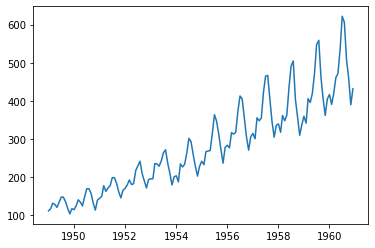

In [7]:
#set_trace()
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
##data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index
#convert to time series:
tsAirP = pasajeros['NPassengers']
plt.plot(tsAirP)
type(tsAirP)
type(pasajeros)

In [8]:

###Chequear si hay necesidad de estabilizar varianza
salida1=sp.stats.boxcox(tsAirP,alpha=0.05)
#sp.stats.boxcox(data['NPassengers'],alpha=0.05) Se puede usar también
salida1
type(salida1)

(array([ 6.82749005,  6.93282224,  7.16189151,  7.11461078,  6.98378687,
         7.20826542,  7.39959794,  7.39959794,  7.22352834,  6.94993188,
         6.67930112,  6.93282224,  6.88074148,  7.0663838 ,  7.29843847,
         7.20826542,  7.05009066,  7.41371485,  7.69297755,  7.69297755,
         7.53726005,  7.17744836,  6.86312389,  7.28363955,  7.35675408,
         7.42775127,  7.791663  ,  7.6033268 ,  7.71801394,  7.791663  ,
         8.03379957,  8.03379957,  7.86322651,  7.59025293,  7.3711186 ,
         7.64214252,  7.70552693,  7.81574285,  7.96693012,  7.82769741,
         7.85143867,  8.23478523,  8.35415797,  8.46833738,  8.14152446,
         7.94424651,  7.71801394,  7.97819691,  8.00058286,  8.00058286,
         8.41186604,  8.40233549,  8.34441554,  8.47763304,  8.66568618,
         8.73398286,  8.42136224,  8.16254066,  7.81574285,  8.05570781,
         8.08822445,  7.90983871,  8.40233549,  8.32482145,  8.39277032,
         8.66568618,  8.97573698,  8.90544371,  8.6

tuple

numpy.ndarray

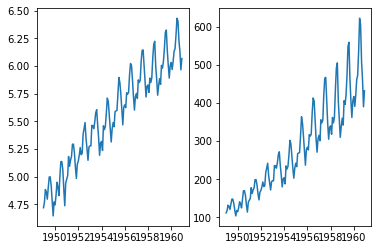

In [9]:
logAirp=sp.stats.boxcox(data['NPassengers'],lmbda=0)
type(logAirp)
data = data.assign(logAirp=logAirp)   

logpasajeros=data.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
ax1.plot(logAirPass)
ax2.plot(tsAirP)



In [10]:
from statsmodels.tsa.stattools import adfuller
resultadoadf=adfuller(logAirPass,regression="nc")####maxlag es importante
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(logAirPass,regression="nc",maxlag=12,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue
  
###Al no rechazarse la hipótesis nula implica que existe raíz unitaria.

ADF Statistic: 2.483278
P-value: 0.997997
	1%: -2.583
	5%: -1.943
	10%: -1.615


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              54.14
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                    2.06e-43
Time:                        18:20:47   Log-Likelihood:                          232.93
No. Observations:                 131   AIC:                                     -439.9
Df Residuals:                     118   BIC:                                     -402.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0054      0.001      3.787      0.000       0.003       0.008
x2            -0.1988      0.072     -2.758      0.007      -0.342      -0.056
x3            -0.2737      0.073     -3.734      0.000      -0.419      -0.129
x4            -0.2336      0.072     -3.233      0.002      -0.377      -0.091
x5            -0.2931      0.074     -3.965      0.000      -0.440      -0.147
x6            -0.2066      0.072     -2.867      0.005      -0.349      -0.064
x7            -0.2669      0.071     -3.734      0.000      -0.408      -0.125
x8            -0.2345      0.072     -3.264      0.001      -0.377      -0.092
x9            -0.3274      0.073     -4.473      0.000      -0.472      -0.182
x10           -0.1985      0.074     -2.696      0.008      -0.344      -0.053
x11           -0.2799      0.073     -3.850      0.000      -0.424      -0.136
x12           -0.1761      0.073     -2.412      0.017      -0.321      -0.032
x13            0.6274      0.073      8.632      0.000       0.483       0.771
==============================================================================
Omnibus:                        7.013   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.374
Skew:                           0.397   Prob(JB):                       0.0250
Kurtosis:                       3.849   Cond. No.                         309.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.9999992645720288

In [11]:
logAirPass

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: logAirp, Length: 144, dtype: float64

C:\Users\OLEG_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  after removing the cwd from sys.path.


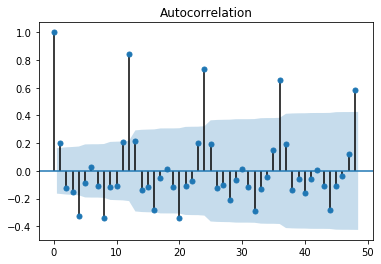

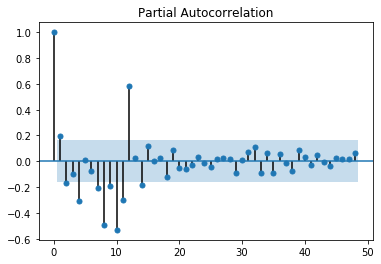

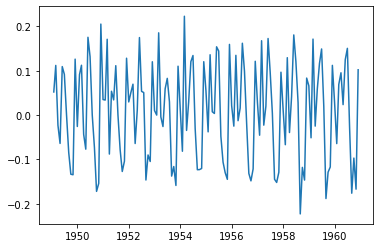

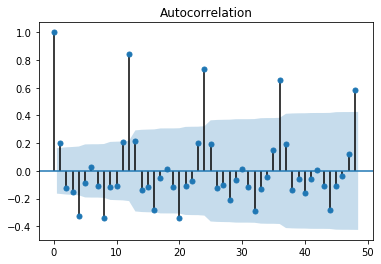

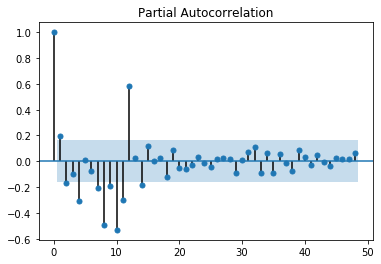

In [12]:
logdiff_1=logAirPass.diff(periods=1)[1:]
plt.plot(logdiff_1)
###Ahora procedemos a ajustar un modelo ARMA a la serie diferenciada
plot_acf(logdiff_1,lags=48,unbiased=False)
plot_pacf(logdiff_1,lags=48,method='ldbiased')

In [13]:
help(plot_acf)

Help on function plot_acf in module statsmodels.graphics.tsaplots:

plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)
    Plot the autocorrelation function
    
    Plots lags on the horizontal and the correlations on vertical axis.
    
    Parameters
    ----------
    x : array_like
        Array of time-series values
    ax : AxesSubplot, optional
        If given, this subplot is used to plot in instead of a new figure being
        created.
    lags : {int, array_like}, optional
        An int or array of lag values, used on horizontal axis. Uses
        np.arange(lags) when lags is an int.  If not provided,
        ``lags=np.arange(len(corr))`` is used.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where th

In [14]:
resultadoadf=adfuller(logdiff_1,regression="nc",maxlag=10)####maxlag es importante
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(logdiff_1,regression="nc",maxlag=10,store=True,regresults=True)####maxlag es importante
pvalue
resstore.resols.summary()

ADF Statistic: -10.213639
P-value: 0.000000
	1%: -2.583
	5%: -1.943
	10%: -1.615


3.4033808007548146e-18

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              27.62
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                    5.96e-27
Time:                        18:20:50   Log-Likelihood:                          153.89
No. Observations:                 133   AIC:                                     -287.8
Df Residuals:                     123   BIC:                                     -258.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.8326      0.375    -10.214      0.000      -4.575      -3.090
x2             2.8243      0.333      8.470      0.000       2.164       3.484
x3             2.4028      0.295      8.141      0.000       1.819       2.987
x4             2.2727      0.271      8.389      0.000       1.736       2.809
x5             1.7184      0.248      6.938      0.000       1.228       2.209
x6             1.5998      0.211      7.598      0.000       1.183       2.017
x7             1.2587      0.167      7.531      0.000       0.928       1.590
x8             1.1075      0.143      7.759      0.000       0.825       1.390
x9             0.5320      0.115      4.636      0.000       0.305       0.759
x10            0.4378      0.083      5.255      0.000       0.273       0.603
==============================================================================
Omnibus:                        1.253   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.237
Skew:                          -0.125   Prob(JB):                        0.539
Kurtosis:                       2.599   Cond. No.                         20.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\OLEG_\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  


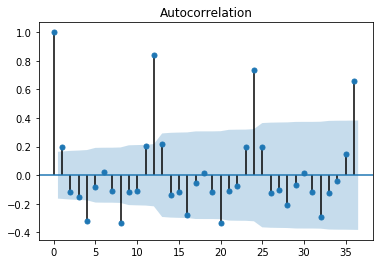

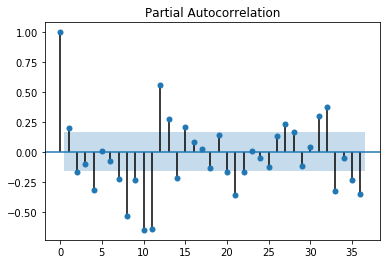

In [15]:
#acf(diff_1,nlags=20,unbiased=False)
acfplot=plot_acf(logdiff_1,lags=36,unbiased=False)
#pacf(diff_1,nlags=20)
pacfplot=plot_pacf(logdiff_1,lags=36)

In [16]:
from pmdarima.arima import auto_arima
auto = auto_arima(logdiff_1, error_action='ignore',max_p=12 ,max_q=12,max_order=12,seasonal=False, m=12,information_criterion='bic')
auto.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [17]:

####Ajuste del modelo
modelofinal = smapi.tsa.statespace.SARIMAX(logAirPass, trend='c',order=(2,1,2))  
results_final = modelofinal.fit()
print(results_final.summary())



/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                logAirp   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 137.272
Date:                Wed, 25 Nov 2020   AIC                           -262.544
Time:                        05:53:26   BIC                           -244.767
Sample:                    01-01-1949   HQIC                          -255.320
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0057      0.001      4.686      0.000       0.003       0.008
ar.L1          0.1845      0.154      1.196      0.232      -0.118       0.487
ar.L2          0.2489      0.143      1.740      0.0

/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Componente Estacional

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: logAirp, Length: 143, dtype: float64


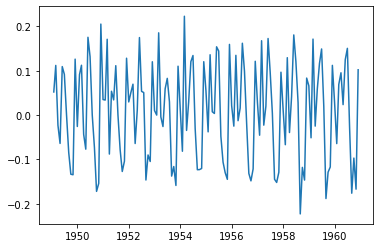

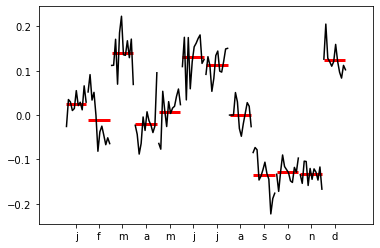

In [18]:
import seaborn
plt.plot(logdiff_1)
fig = smapi.graphics.tsa.month_plot(logdiff_1)
print(logdiff_1)

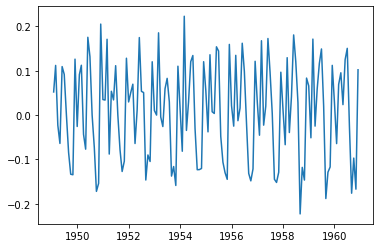

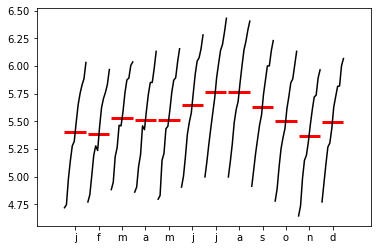

In [19]:
import seaborn
plt.plot(logdiff_1)
fig = smapi.graphics.tsa.month_plot(logAirPass)

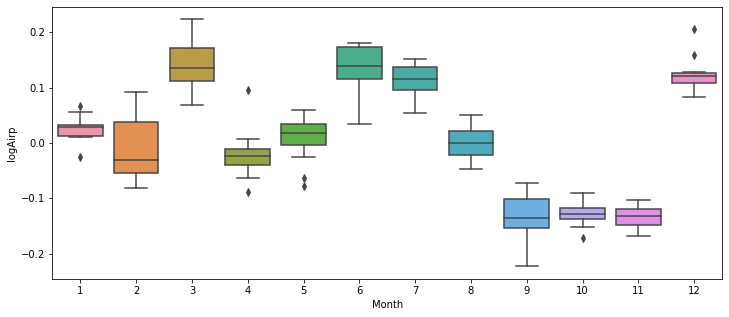

In [20]:
ig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(logdiff_1.index.month, logdiff_1, ax=ax)

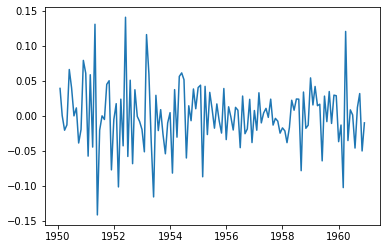

In [21]:
diff_12logdiff_1=logdiff_1.diff(periods=12)[12:]
plt.plot(diff_12logdiff_1)

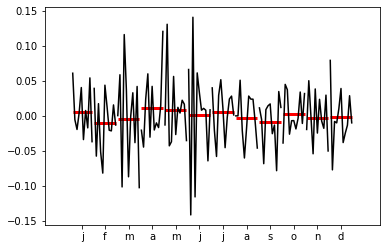

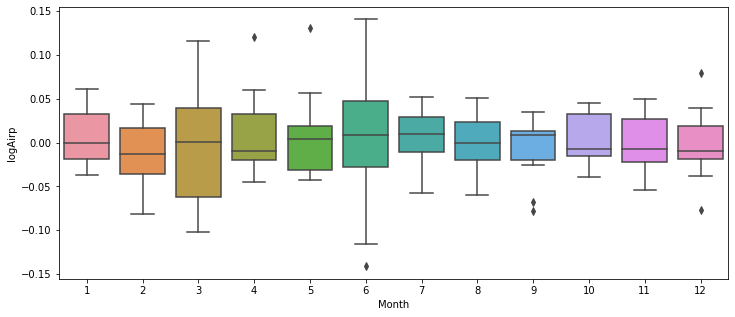

In [22]:
fig = smapi.graphics.tsa.month_plot(diff_12logdiff_1)
ig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(diff_12logdiff_1.index.month, diff_12logdiff_1, ax=ax)

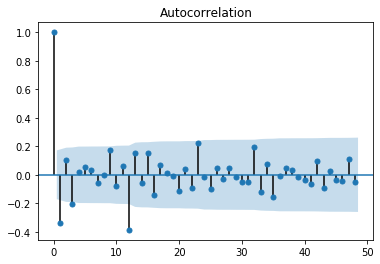

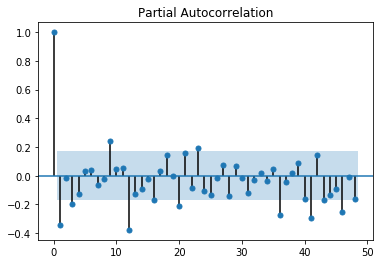

In [23]:
#acf(diff_1,nlags=20,unbiased=False)
acfplot=plot_acf(diff_12logdiff_1,lags=48,unbiased=False)
#pacf(diff_1,nlags=20)
pacfplot=plot_pacf(diff_12logdiff_1,lags=48)
###q=3,p=9
###Q=1 , P=3

In [24]:
modelofinal = smapi.tsa.statespace.SARIMAX(logAirPass, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))  
results_final = modelofinal.fit()###Dentro de los parentesis use_boxcox=False
print(results_final.summary())

/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                            logAirp   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Wed, 25 Nov 2020   AIC                           -483.393
Time:                                    05:53:52   BIC                           -474.767
Sample:                                01-01-1949   HQIC                          -479.888
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4018      0.073     -5.502      0.000      -0.545      -0.259
ma.S.L12      -0.5567      0.096   

# Verificación de supuestos

In [25]:
####Llevar a cabo la verificación de los supuestos

# Pronósticos

,lower logAirp,upper logAirp
1959-12-01,5.913321,6.057243
1960-01-01,5.965412,6.109333
1960-02-01,5.912769,6.056690
1960-03-01,6.059929,6.203850
1960-04-01,5.977222,6.121143
1960-05-01,6.068564,6.212485
1960-06-01,6.223325,6.367246
1960-07-01,6.344389,6.488310
1960-08-01,6.367175,6.511096
1960-09-01,6.168215,6.312136


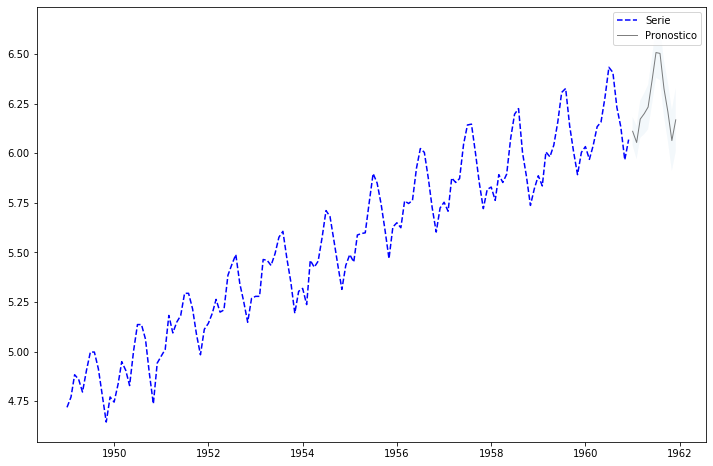

In [26]:

####Etapa de pronósticos
pronosticos=results_final.forecast(steps=12)

salforecast=results_final.get_prediction(start=131, end=142,full_results=True,alpha=0.05,dynamic=False)
salforecast.conf_int(alpha=0.05)

salforecastotro=results_final.get_forecast(steps=12)
ICforecast95=salforecastotro.conf_int(alpha=0.05)
pronosticos=salforecastotro.predicted_mean

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(logAirPass.astype('float64'), '--', color="blue", label='Serie')
# Pronóstico
ax.plot(pronosticos, lw=1, color="black", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICforecast95.iloc[:, 0], ICforecast95.iloc[:, 1], alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

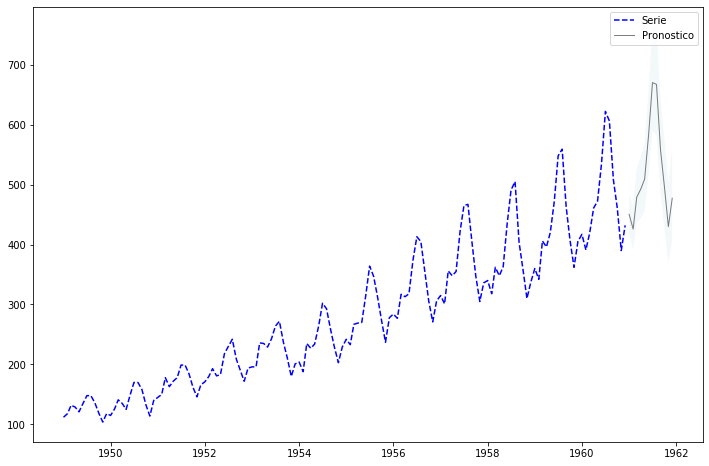

In [27]:
#sp.special.inv_boxcox(logAirPass,lmbda=0)
####Etapa de pronósticos
pronosticos=results_final.forecast(steps=12)

#salforecast=results_final.get_prediction(start=131, end=142,full_results=True,alpha=0.05,dynamic=False)
#salforecast.conf_int(alpha=0.05)

salforecastotro=results_final.get_forecast(steps=12)
ICforecast95=salforecastotro.conf_int(alpha=0.05)
pronosticos=salforecastotro.predicted_mean

###Reescalar#####
pronosticos_inboxcox=sp.special.inv_boxcox(np.array(pronosticos[0:]),0)
ICinfforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,0]),0)
ICsupforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,1]),0)
pronosticos_inboxcox=pd.Series(pronosticos_inboxcox,index=pronosticos.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(tsAirP.astype('float64'), '--', color="blue", label='Serie')
# Pronóstico
ax.plot(pronosticos_inboxcox, lw=1, color="black", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICinfforecast95_invbox, ICsupforecast95_invbox, alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

In [ ]:
####Falta el tema del la descomposicón espectral

In [ ]:
######Hasta aquí

Simularemos procesos que tienen raíces unitarias, es decir procesos con tendecía estocástica.<br>
$(1-B)(1-0.5B)X_{t}=Z_{t}$


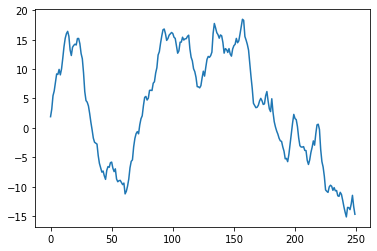

In [8]:
inic=50
Tlength=250
arparams = np.array([-1.5, 0.5])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y1 = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -349.611
Date:                Wed, 20 May 2020   AIC                            703.223
Time:                        06:09:15   BIC                            710.258
Sample:                             0   HQIC                           706.054
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5038      0.059      8.574      0.000       0.389       0.619
sigma2         0.9695      0.078     12.404      0.000       0.816       1.123
===================================================================================
Ljung-Box (Q):                       42.86   Jarque-Bera (JB):                 4.39
Prob(Q):                              0.35   Prob(JB):                         0.11
Heteroskedasticity (H):               1.17   Skew:                            -0.18
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

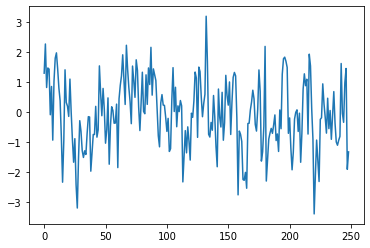

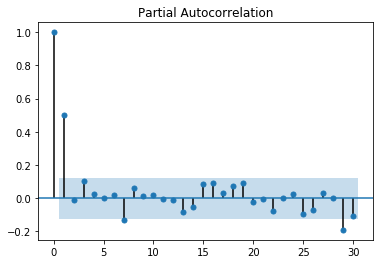

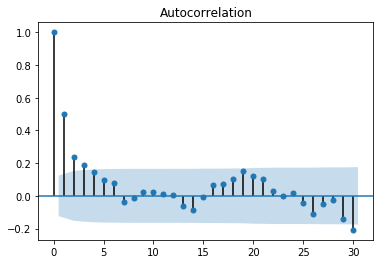

In [9]:
diffy1=np.diff(y1,n=1)
plt.plot(diffy1)
graph1=plot_pacf(diffy1,lags=30)
graph2=plot_acf(diffy1,lags=30)
#plot_acf(y1,lags=10,unbiased=False)
modeloarima1=smapi.tsa.statespace.SARIMAX(y1, trend='n', order=(1,1,0))
ajustearima=modeloarima1.fit()
ajustearima.summary()

Tenemos, caminata Aleatoria con drift, es decir, 
$X_{t}=c+X_{t-1}+Z_{t}$ y Caminata Aleatoria alrededor de una recta $X_{t}=c+\beta t+X_{t-1}+Z_{t}$

In [10]:
c=1
beta=0.5
tiempo=np.arange(1, Tlength+inic+2, 1)
#xt=beta*tiempo

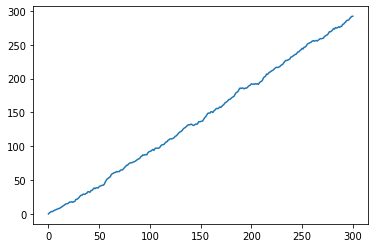

In [11]:
Zt=np.random.normal(0,1,Tlength+inic+1)###Cambiar los valores de la varianza
Xtdrift=np.zeros(Tlength+inic+1)
XtRWlin=np.zeros(Tlength+inic+1)
for t in range(Tlength+inic+1):
    Xtdrift[t]=c+Xtdrift[t-1]+Zt[t]###Caminata Aleatoria con Drift
    XtRWlin[t]=c+beta*tiempo[t]+XtRWlin[t-1]+Zt[t]###Caminata aleatoria alrededor de una recta
fig1=plt.plot(Xtdrift)


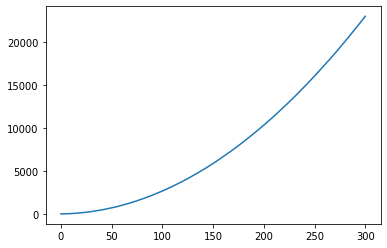

In [12]:

fig2=plt.plot(XtRWlin)   

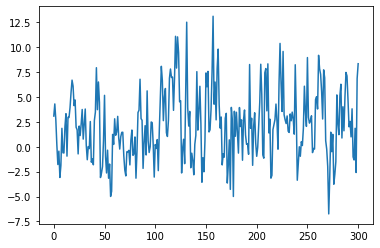

In [14]:
Zt=np.random.normal(0,3,Tlength+inic+1)###Cambiar los valores de la varianza
Xtesta=np.zeros(Tlength+inic+1)
Xtlinesta=np.zeros(Tlength+inic+1)
for t in range(Tlength+inic+1):
    Xtesta[t]=c+0.5*Xtesta[t-1]+Zt[t]
    Xtlinesta[t]=c+beta*tiempo[t]+0.5*Xtlinesta[t-1]+Zt[t]
fig3=plt.plot(Xtesta)

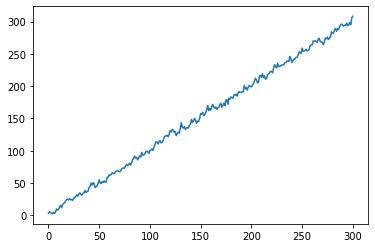

In [15]:
####Tendencia determinística

fig4=plt.plot(Xtlinesta) 

Simulación Raíz Unitaria

In [17]:
Tlength=300
N=1000
arparams = np.array([-1])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
phi=np.zeros(N)
for rep in range(N):
    simul = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
    ajuste=smapi.tsa.statespace.SARIMAX(simul, trend='c', order=(1,0,0))
    results = ajuste.fit()
    coeffs = results.params
    #print(rep)
    phi[rep]=coeffs[1]


(array([  3.,   3.,   5.,   8.,  30.,  60.,  83., 141., 296., 371.]),
 array([0.9072284 , 0.91649703, 0.92576566, 0.93503428, 0.94430291,
        0.95357154, 0.96284017, 0.9721088 , 0.98137743, 0.99064605,
        0.99991468]),
 <a list of 10 Patch objects>)

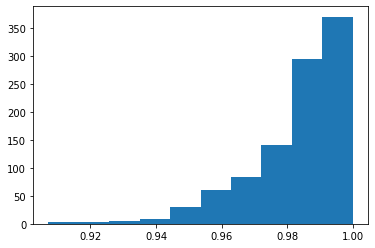

In [19]:
plt.hist(phi)###Note la distribución del estimador de phi

ADF Statistic: -1.713758
P-value: 0.082045
	1%: -2.574
	5%: -1.942
	10%: -1.616


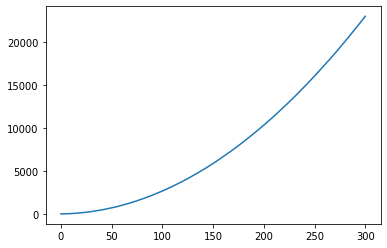

In [25]:
###serie con tendencia estocástica pero alrededor de una linea recta
fig1=plt.plot(XtRWlin)
resultadoadfxtrwlin=adfuller(XtRWlin,regression="nc")
print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.057125
P-value: 0.000058
	1%: -2.573
	5%: -1.942
	10%: -1.616


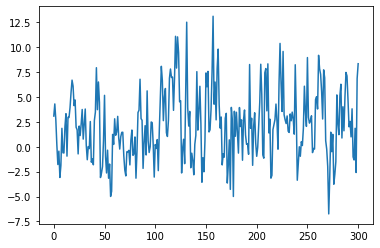

In [26]:
###serie con tendencia estocástica pero alrededor de una linea recta
fig1=plt.plot(Xtesta)
resultadoadfxtesta=adfuller(Xtesta,regression="nc")
print('ADF Statistic: %f' % resultadoadfxtesta[0])
print('P-value: %f' % resultadoadfxtesta[1])
for key, value in resultadoadfxtesta[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 6.560415
P-value: 1.000000
	1%: -2.573
	5%: -1.942
	10%: -1.616


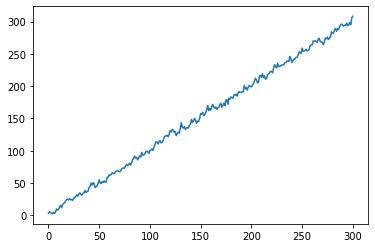

In [27]:
###serie con tendencia estocástica pero alrededor de una linea recta
fig1=plt.plot(Xtlinesta)
resultadoadfxtlinesta=adfuller(Xtlinesta,regression="nc")
print('ADF Statistic: %f' % resultadoadfxtlinesta[0])
print('P-value: %f' % resultadoadfxtlinesta[1])
for key, value in resultadoadfxtlinesta[4].items():
    print('\t%s: %.3f' % (key, value))

In [16]:
Tlength=300
N=1000
arparams = np.array([-1])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
tstat=np.zeros(N)
for rep in range(N):
    simul = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
    ajuste=smapi.tsa.statespace.SARIMAX(simul, trend='c', order=(1,0,0))
    results = ajuste.fit()
    coeffs = results.params
    #print(rep)
    tstat[rep]=(coeffs[1]-1)/results.bse[1]



/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyboardInterrupt: 

In [ ]:
#results.bse[1]
#results.summary()
plt.hist(tstat)